# Plot a Decision Boundry for Machine Learning Algorithms in Python

Thistutorial is autored by [KVS Setty](http://www.kvssetty.com/about/)

You can find the complete source code at [my git repository ](https://github.com/KVSSetty/ML-DL-notebooks-on-Binder)

Classification algorithms learn how to assign class labels to examples(observations or data points), although their decisions can appear opaque.

A popular diagnostic for understanding the decisions made by a classification algorithm is the **decision surface**. This is a plot that shows how a trained machine learning algorithm predicts a coarse grid across the input feature space.

A decision surface plot is a powerful tool for understanding how a given model “sees” the prediction task and how it has decided to divide the input feature space by class label.

In this tutorial, you will discover how to plot a decision surface for a classification machine learning algorithm.

After completing this tutorial, you will know:

- Decision surface is a diagnostic tool for understanding how a classification algorithm divides up the feature space.
- How to plot a decision surface for using crisp class labels for a machine learning algorithm.
- How to plot and interpret a decision surface using predicted probabilities.

Let’s get started.

![right-wrong-image](right-wrong-classification-image.jpg)

## Tutorial Overview
This tutorial is divided into four parts; they are:

1. Decision Surface
2. Dataset and Model
3. Plot a Decision Surface
4. Plot the decision surface of a decision tree on the iris dataset

## Decision Surface
Classification machine learning algorithms learn to assign labels to input examples (observations).

Consider numeric input features for the classification task defining a continuous input feature space.

We can think of each input feature defining an axis or dimension on a feature space. Two input features would define a feature space that is a plane, with dots representing input coordinates in the input space. If there were three input variables, the feature space would be a three-dimensional volume.If there were **n** input variables, the feature sapce be a **n-dimensional hyper plane**. Diffcult to visualize spaces beyond three dimensions.

Each point in the space can be assigned a class label. In terms of a two-dimensional feature space, we can think of each point on the planing having a different color, according to their assigned class.

The goal of a classification algorithm is to learn how to divide up the feature space such that labels are assigned correctly to points in the feature space, or at least, as correctly as is possible.

This is a useful geometric understanding of predictive classification modeling. We can take it one step further.

Once a classification machine learning algorithm divides a feature space, we can then classify each point in the feature space, on some arbitrary grid, to get an idea of how exactly the algorithm chose to divide up the feature space.

This is called a **decision surface** or **decision boundary**, and it provides a diagnostic tool for understanding a model on a predictive classification modeling task.

Although the notion of a “surface” suggests a two-dimensional feature space, the method can be used with feature spaces with more than two dimensions, where a surface is created for each pair of input features.

Now that we are familiar with what a decision surface is, next, let’s define a dataset and model for which we later explore the decision boundry.

## Dataset and Model
In this section, we will define a classification task and predictive model to learn the task.

### Synthetic Classification Dataset
We can use the [make_blobs() scikit-learn function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) to define a classification task with a two-dimensional numerical feature space and each point assigned one of two class labels, e.g. a binary classification task.

```python
...
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=26, cluster_std=3)
```

Once defined, we can then create a scatter plot of the feature space with the first feature defining the x-axis, the second feature defining the y-axis, and each sample represented as a point in the feature space.

We can then color points in the scatter plot according to their class label as either 0 or 1.

```python
...
# create scatter plot for samples from each class
import numpy as np
import pandas as pd
import Matplotlib.pyplot as plt
%matplotlib inline
Import seaborn as sns
sns.scatterplot(x="x1", y="x2", hue='class', data=data)
```

cobing all this together, the complete example of defining and plotting a synthetic classification dataset is listed below.

In [1]:
# generate binary classification dataset and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_blobs
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)



In [2]:
X_df = pd.DataFrame(X, columns=['x1','x2'])
X_df.head()

,x1,x2
0,-5.855998,4.651793
1,-5.833791,-3.274749
2,7.433011,6.880244
3,-8.022102,-0.956644
4,-14.719933,-3.651568


In [3]:
y_df = pd.DataFrame(y, columns=["class"])

In [4]:
y_df.head()

,class
0,0
1,1
2,0
3,1
4,1


In [5]:
frames = [X_df, y_df]
data = pd.concat(frames, axis=1)
data.head()

,x1,x2,class
0,-5.855998,4.651793,0
1,-5.833791,-3.274749,1
2,7.433011,6.880244,0
3,-8.022102,-0.956644,1
4,-14.719933,-3.651568,1


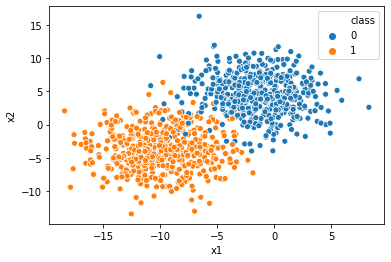

In [6]:
# create scatter plot for samples from each class
sns.scatterplot(x="x1", y="x2", hue='class', data=data)

Running the example above created the dataset, then plots the dataset as a scatter plot with points colored by class label.

We can see a clear separation between examples from the two classes and we can imagine how a machine learning model might draw a line to separate the two classes, e.g. perhaps a diagonal line right through the middle of the two groups.

### Fit Predictive Classification Model
We can now fit a model on our dataset.

In this case, we will fit a logistic regression algorithm because we can predict both crisp class labels and probabilities, both of which we can use in our decision surface.

We can define the model, then fit it on the training dataset.

```python
...
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
```

Once defined, we can use the model to make a prediction for the training dataset to get an idea of how well it learned to divide the feature space of the training dataset and assign labels.

```pyhton
...
# make predictions
yhat = model.predict(X)
```

The predictions can be evaluated using classification accuracy.

```python
...
# evaluate the predictions
acc = accuracy_score(y, yhat)
print('Accuracy: %.3f' % acc)
```

combining all this together, the complete example of fitting and evaluating a model on the synthetic binary classification dataset is listed below.

In [7]:
# example of fitting and evaluating a model on the classification dataset
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# make predictions
yhat = model.predict(X)
# evaluate the predictions
acc = accuracy_score(y, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.972


Running the example fits the model and makes a prediction for each example.

Your specific results may vary given the stochastic nature of the learning algorithm. Try running the example a few times.

In this case, we can see that the model achieved a performance of about 97.2 percent.

Now that we have a dataset and model, let’s explore how we can develop a decision surface.

## Plot a Decision Surface
We can create a decision boundry by fitting a model on the training dataset, then using the model to make predictions for a grid of values across the input domain.

Once we have the grid of predictions, we can plot the values and their class label.

A scatter plot could be used if a fine enough grid was taken. A better approach is to use a contour plot that can interpolate the colors between the points.

The [contourf() Matplotlib function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) can be used.

This requires a few steps.

First, we need to define a grid of points across the feature space.

To do this, we can find the minimum and maximum values for each feature and expand the grid one step beyond that to ensure the whole feature space is covered.

```python
...
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
```

We can then create a uniform sample across each dimension using the `arange()` function at a chosen resolution. We will use a resolution of 0.1 in this case.

```python
...
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
```

Now we need to turn this into a grid.

We can use the [meshgrid() NumPy function](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to create a grid from these two vectors.

If the first feature x1 is our x-axis of the feature space, then we need one row of x1 values of the grid for each point on the y-axis.

Similarly, if we take x2 as our y-axis of the feature space, then we need one column of x2 values of the grid for each point on the x-axis.

The `meshgrid()` function will do this for us, duplicating the rows and columns for us as needed. It returns two grids for the two input vectors. The first grid of x-values and the second of y-values, organized in an appropriately sized grid of rows and columns across the feature space.

```python
...
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
```

We then need to flatten out the grid to create samples that we can feed into the model and make a prediction.

To do this, first, we flatten each grid into a vector.

```python
...
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
```

```python
...
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
```

Then we stack the vectors side by side as columns in an input dataset, e.g. like our original training dataset, but at a much higher resolution.

```python
...
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
```

We can then feed this into our model and get a prediction for each point in the grid.

```python
...
# make predictions for the grid
yhat = model.predict(grid)

```

So far, so good.

We have a grid of values across the feature space and the class labels as predicted by our model.

Next, we need to plot the grid of values as a contour plot.

The [contourf() function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) takes separate grids for each axis, just like what was returned from our prior call to `meshgrid()`. Great!

So we can use xx and yy that we prepared earlier and simply reshape the predictions (yhat) from the model to have the same shape.

```python
...
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
```

We then plot the decision surface with a two-color colormap.

```python
...
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')
```

We can then plot the actual points of the dataset over the top to see how well they were separated by the logistic regression decision surface.

The complete example of plotting a decision surface for a logistic regression model on our synthetic binary classification dataset is listed below.

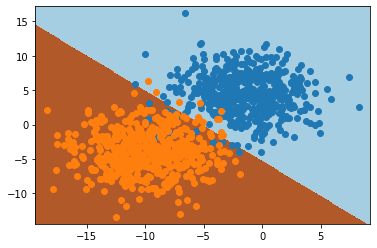

In [8]:
# decision surface for logistic regression on a binary classification dataset
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


We can add more depth to the decision surface by using the model to predict probabilities instead of class labels.

```python
...
# make predictions for the grid
yhat = model.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
```

When plotted, we can see how confident or likely it is that each point in the feature space belongs to each of the class labels, as seen by the model.

We can use a [different color map](https://matplotlib.org/tutorials/colors/colormaps.html) that has gradations, and show a legend so we can interpret the colors.

```python
...
# plot the grid of x, y and z values as a surface
c = pyplot.contourf(xx, yy, zz, cmap='RdBu')
# add a legend, called a color bar
pyplot.colorbar(c)
```

The complete example of creating a decision surface using probabilities is listed below.

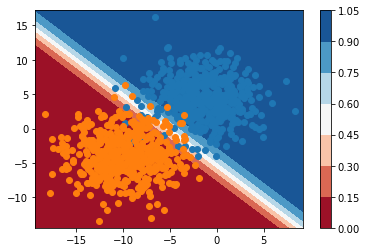

In [9]:
# probability decision surface for logistic regression on a binary classification dataset
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# make predictions for the grid
yhat = model.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu')
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


Running the example predicts the probability of class membership for each point on the grid across the feature space and plots the result.

Here, we can see that the model is unsure (lighter colors) around the middle of the domain, given the sampling noise in that area of the feature space. We can also see that the model is very confident (full colors) in the bottom-left and top-right halves of the domain.

Together, the crisp class and probability decision surfaces are powerful diagnostic tools for understanding your model and how it divides the feature space for your predictive modeling task.

## Plot the decision surface of a decision tree on the iris dataset





Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See [`decision tree`](https://scikit-learn.org/stable/modules/tree.html#tree) for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

We also show the tree structure of a model built on all of the features.


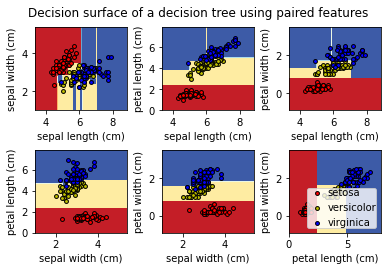

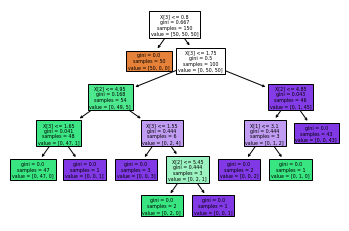

In [10]:


import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

## Summary
In this tutorial, you discovered how to plot a decision surface for a classification machine learning algorithm.

Specifically, you learned:

- Decision surface is a diagnostic tool for understanding how a classification algorithm divides up the feature space.
- How to plot a decision surface for using crisp class labels for a machine learning algorithm.
- How to plot and interpret a decision surface using predicted probabilities.

**Do you have any questions?**

Ask your questions in the comments section of the post, I try to do my best to answer.